In [5]:
#Importamos librerías
import pandas as pd
import seaborn as sns

In [6]:
#Cargamos los datos y los preparamos!
data = pd.read_csv("../bases/hotels.csv", sep = ",")

In [7]:
#Hacemos una copia del dataset y me quedo con algunas variables
data2 = data[['total_of_special_requests','deposit_type','customer_type', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces','arrival_date_month',
'arrival_date_day_of_month','hotel']].copy()

In [8]:
#Veamos que tenemos!
data2.head()

,total_of_special_requests,deposit_type,customer_type,stays_in_weekend_nights,stays_in_week_nights,required_car_parking_spaces,arrival_date_month,arrival_date_day_of_month,hotel
0,0,No Deposit,Transient,0,0,0,July,1,Resort Hotel
1,0,No Deposit,Transient,0,0,0,July,1,Resort Hotel
2,0,No Deposit,Transient,0,1,0,July,1,Resort Hotel
3,0,No Deposit,Transient,0,1,0,July,1,Resort Hotel
4,1,No Deposit,Transient,0,2,0,July,1,Resort Hotel


Creamos la variable target: 
    

In [9]:
data2['total_stay'] = data2['stays_in_week_nights'] + data2['stays_in_weekend_nights']

# Eliminamos las var q usamos...
data3 = data2.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)

In [10]:
data3.head()

,total_of_special_requests,deposit_type,customer_type,required_car_parking_spaces,arrival_date_month,arrival_date_day_of_month,hotel,total_stay
0,0,No Deposit,Transient,0,July,1,Resort Hotel,0
1,0,No Deposit,Transient,0,July,1,Resort Hotel,0
2,0,No Deposit,Transient,0,July,1,Resort Hotel,1
3,0,No Deposit,Transient,0,July,1,Resort Hotel,1
4,1,No Deposit,Transient,0,July,1,Resort Hotel,2


Histogramas de las variables:

C:\Users\gusta\AppData\Local\Temp\ipykernel_13028\3077317509.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data3.hist(ax = fig.gca()) #Realizamos el histograma de las variables


array([[<AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'total_stay'}>]], dtype=object)

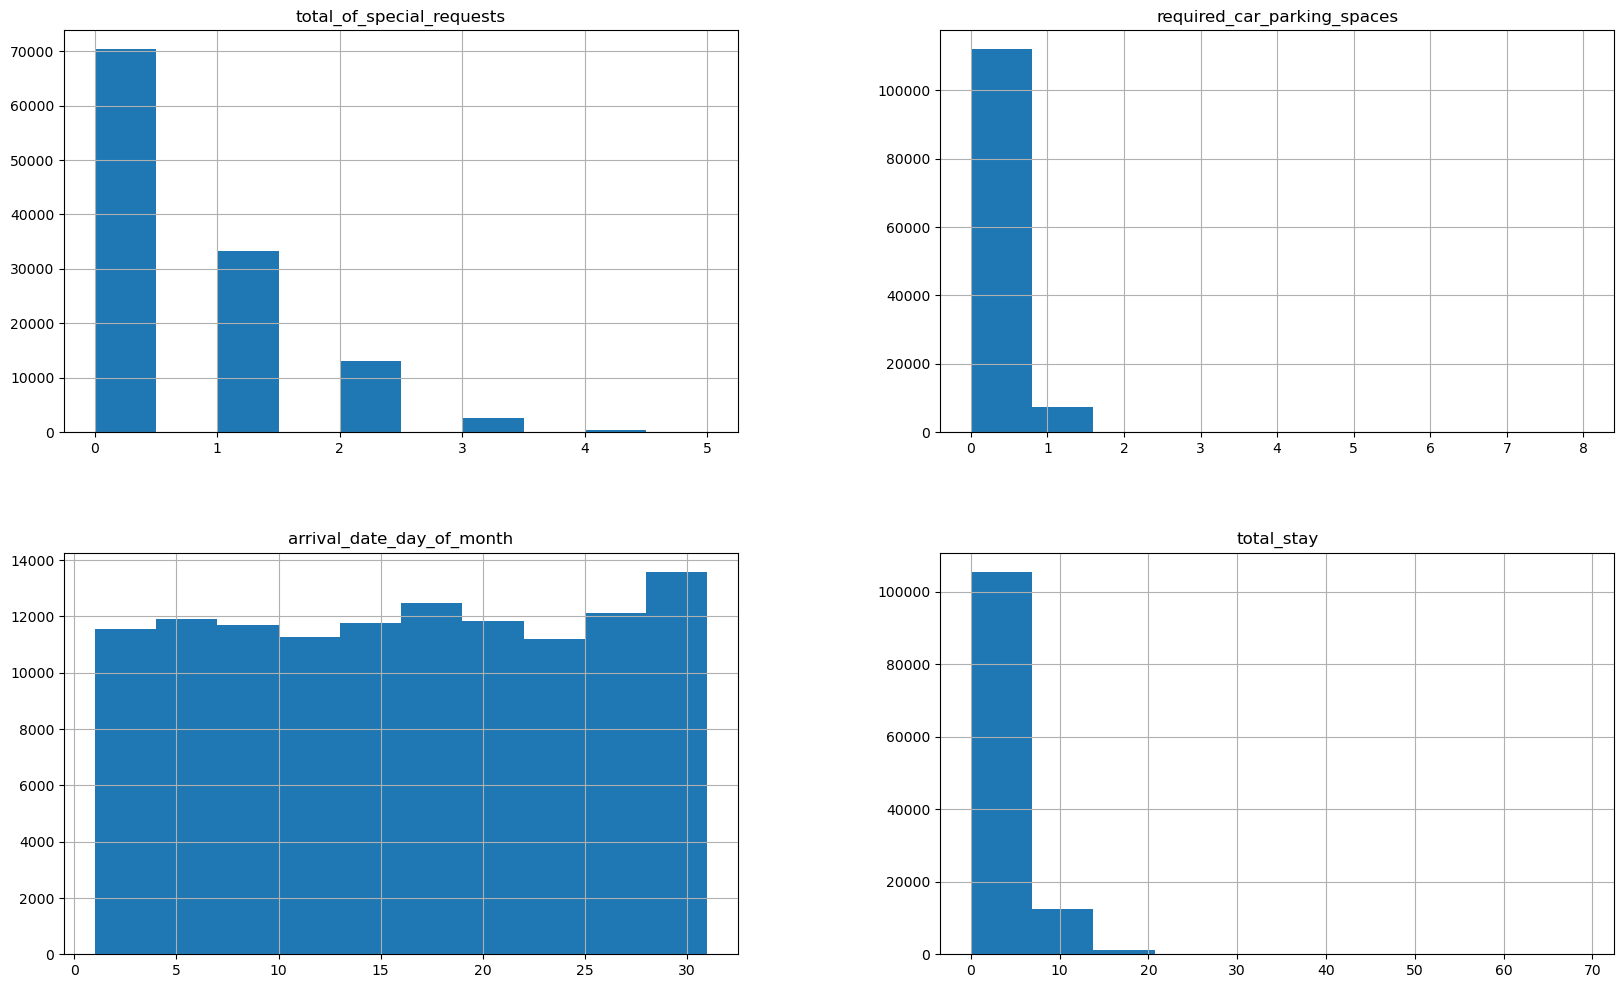

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,12)) #Definimos el tamaño del grafico
data3.hist(ax = fig.gca()) #Realizamos el histograma de las variables

In [12]:
#Hacemos dummies las variables!
data4=pd.get_dummies(data3, drop_first=True)

In [13]:
data4.head()

,total_of_special_requests,required_car_parking_spaces,arrival_date_day_of_month,total_stay,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_month_August,...,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,hotel_Resort Hotel
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,1,2,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [14]:
#Separamos los datos de entrada de los de salida
x_data=data4.drop('total_stay', axis=1)
y_data=data4['total_stay']

In [15]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [16]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [17]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [100, 200, 500],
    'max_features': [2,3]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # 
                                  cv = 5, 
                                  verbose = 1, # print dos resultados
                                  n_jobs = -1) # paralelo

In [18]:
#Entrenamos el modelo
grid_random_forest.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [2, 3],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_absolute_error', verbose=1)

In [19]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=500)

In [20]:
#Predicción de casos nuevos
grid_random_forest.predict(x_train)
grid_random_forest.predict(x_test)

array([5.29023929, 4.        , 2.        , ..., 3.14236117, 3.04036301,
       2.95523473])